<a href="https://colab.research.google.com/github/Praveen101010/Praveen101010/blob/main/03_Computer_vision_CNN_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#introduction to CNN and Computer vision
 Computer Vision is the practice of writing algorithms which can discover patterns in visual data

#Get the data
the images we're working with are from food101 dataset(101 different classes of food):
However we've modified it to only use two classes (pizza and steak) using the image data modification notebook



In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-05-24 12:21:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.250.4.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  24.0MB/s    in 5.4s    

2023-05-24 12:21:52 (19.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# Inspect the data

!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

#walk through pizza_steak

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}.'")

There are 2 directories and 0 images in 'pizza_steak.'
There are 2 directories and 0 images in 'pizza_steak/test.'
There are 0 directories and 250 images in 'pizza_steak/test/steak.'
There are 0 directories and 250 images in 'pizza_steak/test/pizza.'
There are 2 directories and 0 images in 'pizza_steak/train.'
There are 0 directories and 750 images in 'pizza_steak/train/steak.'
There are 0 directories and 750 images in 'pizza_steak/train/pizza.'


In [ ]:
# the extra file in pizza_steak directory is .DS_store

In [ ]:
num_steack_images_train = len(os.listdir("pizza_steak/train/steak"))

In [ ]:
num_steack_images_train

750

In [ ]:
# to viz our images, first let's get the class names programatically

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
#created a list of class_names from the subdirectory
print(class_names)

['pizza' 'steak']


In [ ]:
#viz our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_ran_img(target_dir, target_class):
  #setup the target directory
  target_folder = target_dir+target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  #Read in the image and plot it using
  img = mpimg.imread(target_folder+ "/"+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape:{img.shape}")

  return img


['132484.jpg']
Image shape:(382, 512, 3)


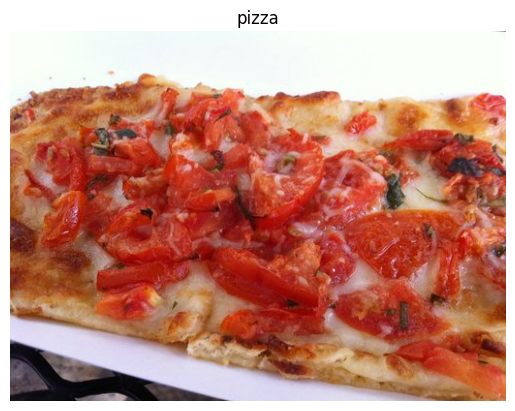

In [ ]:
#view a random img

img = view_ran_img("pizza_steak/train/","pizza")


In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(382, 512, 3), dtype=uint8, numpy=
array([[[250, 255, 248],
        [250, 255, 248],
        [250, 255, 248],
        ...,
        [162, 167, 161],
        [153, 158, 152],
        [149, 154, 148]],

       [[250, 255, 248],
        [250, 255, 248],
        [250, 255, 248],
        ...,
        [244, 249, 243],
        [242, 247, 241],
        [241, 246, 240]],

       [[250, 255, 248],
        [250, 255, 248],
        [250, 255, 248],
        ...,
        [252, 255, 251],
        [252, 255, 251],
        [252, 255, 251]],

       ...,

       [[ 20,  10,  18],
        [ 20,  13,  21],
        [ 22,  15,  23],
        ...,
        [193, 113,  64],
        [195, 116,  60],
        [190, 111,  54]],

       [[ 24,  17,  24],
        [ 25,  18,  26],
        [ 25,  18,  26],
        ...,
        [195, 121,  72],
        [199, 126,  71],
        [196, 124,  65]],

       [[ 28,  21,  28],
        [ 28,  21,  29],
        [ 27,  22,  29],
        ...,
        [203, 133,  8

In [ ]:
img.shape, img/255. #normalizing

((382, 512, 3),
 array([[[0.98039216, 1.        , 0.97254902],
         [0.98039216, 1.        , 0.97254902],
         [0.98039216, 1.        , 0.97254902],
         ...,
         [0.63529412, 0.65490196, 0.63137255],
         [0.6       , 0.61960784, 0.59607843],
         [0.58431373, 0.60392157, 0.58039216]],
 
        [[0.98039216, 1.        , 0.97254902],
         [0.98039216, 1.        , 0.97254902],
         [0.98039216, 1.        , 0.97254902],
         ...,
         [0.95686275, 0.97647059, 0.95294118],
         [0.94901961, 0.96862745, 0.94509804],
         [0.94509804, 0.96470588, 0.94117647]],
 
        [[0.98039216, 1.        , 0.97254902],
         [0.98039216, 1.        , 0.97254902],
         [0.98039216, 1.        , 0.97254902],
         ...,
         [0.98823529, 1.        , 0.98431373],
         [0.98823529, 1.        , 0.98431373],
         [0.98823529, 1.        , 0.98431373]],
 
        ...,
 
        [[0.07843137, 0.03921569, 0.07058824],
         [0.07843137, 0.0

In [ ]:
#building CNN model

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#Preprocessing data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory( directory =train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data =valid_datagen.flow_from_directory(directory = test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                       padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation ="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

his_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                    validation_data = valid_data,
                    validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 23s 240ms/step - loss: 0.5541 - accuracy: 0.7073 - val_loss: 0.5381 - val_accuracy: 0.6960
Epoch 2/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4318 - accuracy: 0.8033 - val_loss: 0.3522 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 10s 215ms/step - loss: 0.4183 - accuracy: 0.8033 - val_loss: 0.3492 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 10s 215ms/step - loss: 0.3562 - accuracy: 0.8473 - val_loss: 0.3161 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 10s 212ms/step - loss: 0.2987 - accuracy: 0.8800 - val_loss: 0.3195 - val_accuracy: 0.8580


In [ ]:
# if the above cells are taking more than 10sec use GPU

In [ ]:
model_1.summary()

#using the same model as before


In [ ]:
tf.random.set_seed(42)

#create a model to replicate
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

his_2 = model_2.fit(train_data,
                epochs=5,
                steps_per_epoch =len(train_data),
                validation_data=valid_data,
                validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 205ms/step - loss: 0.6940 - accuracy: 0.5293 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 203ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 202ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


#despite having 20X more parameters our model_2 is not performing better



In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

his_3 = model_3.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data = valid_data,
                    validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 202ms/step - loss: 4.3589 - accuracy: 0.6407 - val_loss: 0.5207 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 10s 204ms/step - loss: 1.0843 - accuracy: 0.6727 - val_loss: 1.1887 - val_accuracy: 0.6740
Epoch 3/5
47/47 [==============================] - 9s 201ms/step - loss: 0.7353 - accuracy: 0.7587 - val_loss: 0.4962 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 9s 203ms/step - loss: 0.5914 - accuracy: 0.7593 - val_loss: 0.7693 - val_accuracy: 0.7340
Epoch 5/5
47/47 [==============================] - 9s 189ms/step - loss: 0.6810 - accuracy: 0.7553 - val_loss: 0.4853 - val_accuracy: 0.7700


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


#binary Classification: breakdowm

1. Become one with data

['1209120.jpg']
Image shape:(384, 512, 3)
['1593835.jpg']
Image shape:(384, 512, 3)


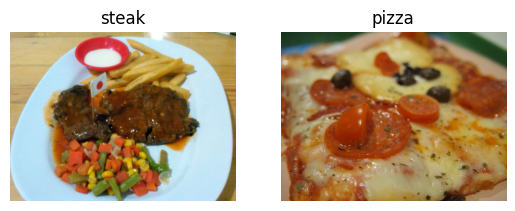

In [ ]:
#visualize data

plt.figure()
plt.subplot(1,2,1)
steak_img = view_ran_img("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_ran_img("pizza_steak/train/","pizza")

2. Pre process the data

In [ ]:
#directory dataset paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

In [ ]:
#create batches
#create train and test data generators and rescale it
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#load in our image data from dir and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode = "binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
len(images),len(labels)

(32, 32)

In [ ]:
#how many batches
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
#get the first two iimages
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

##Create a CNN model(start with a baseline)
A baseline is a relatively simple moedl or existing result that you setup when beginning a ML expri you try to beat the baseline

In [ ]:
#make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
#create model (this will our baseline)

model_4 = Sequential([
    Conv2D(filters=10,# filter is the no. of sliding windows going across an input
          kernel_size=3,
          strides=1,
          padding="valid",
          activation="relu",
          input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_4.compile(loss = "binary_crossentropy",
                optimizer=Adam(),
                metrics="accuracy")


In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
his_4 = model_4.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data = test_data,
                    validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 226ms/step - loss: 2.0280 - accuracy: 0.6493 - val_loss: 0.5121 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 11s 228ms/step - loss: 0.4867 - accuracy: 0.7713 - val_loss: 0.3808 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 10s 216ms/step - loss: 0.3965 - accuracy: 0.8253 - val_loss: 0.3728 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.3152 - accuracy: 0.8753 - val_loss: 0.3395 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 10s 213ms/step - loss: 0.1990 - accuracy: 0.9353 - val_loss: 0.3585 - val_accuracy: 0.8360


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 141ms/step - loss: 0.3195 - accuracy: 0.8580


[0.31950923800468445, 0.8579999804496765]

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

<Axes: >

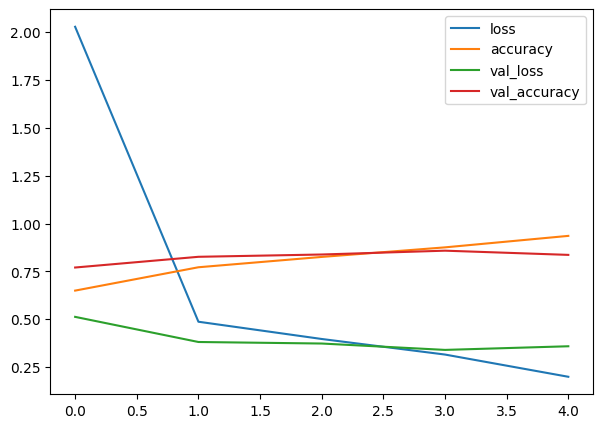

In [ ]:
import pandas as pd
pd.DataFrame(his_4.history).plot(figsize=(7,5))

In [ ]:
#plot the validation and training curves separately

def plot_loss_curves(history):
  """ Returns separate loss curves for training and validation """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

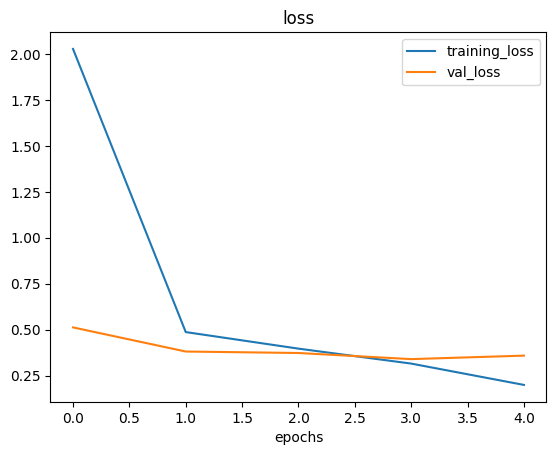

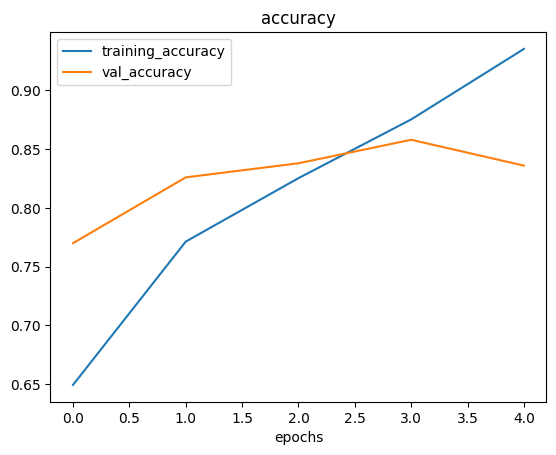

In [ ]:
plot_loss_curves(his_4)

#Adjust the model parameters
0. Create a baseline
1. beat the baseline by overfitting a larger model
2. Reduce overfitting

ways to induce overfitting

1. Inc th no. of conv layers
2. Inc the no. of conv filters
3. add another dense layer to the output of out flattened layer

Reduce overfitting
1. add data augmentation
2. add regularization(such as MaxPool2D)
3. add more data...

In [ ]:
model_5 = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics="accuracy")

In [ ]:
his_5 = model_5.fit(train_data,
                    epochs=5,
                    steps_per_epoch=(len(train_data)),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 212ms/step - loss: 0.6475 - accuracy: 0.6100 - val_loss: 0.5784 - val_accuracy: 0.6820
Epoch 2/5
47/47 [==============================] - 10s 205ms/step - loss: 0.5136 - accuracy: 0.7480 - val_loss: 0.4437 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 0.4574 - accuracy: 0.7847 - val_loss: 0.3974 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 0.4075 - accuracy: 0.8180 - val_loss: 0.3327 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.3817 - accuracy: 0.8267 - val_loss: 0.3161 - val_accuracy: 0.8680


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

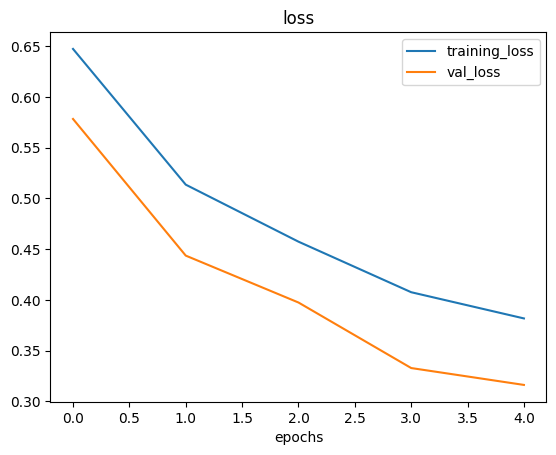

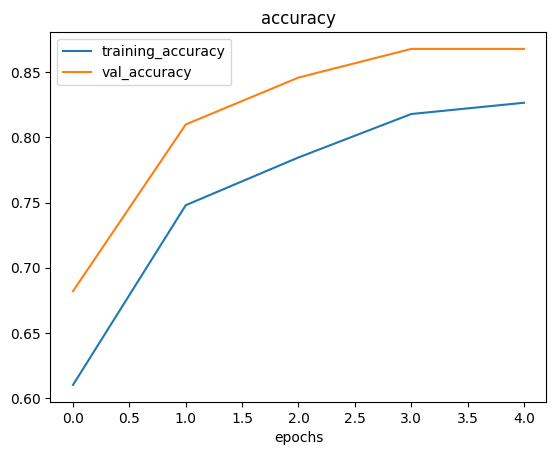

In [ ]:
plot_loss_curves(his_5)

#Data augumentation

In [ ]:
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                       rotation_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.3,
                                       horizontal_flip=True)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
#import data augument it from training directory
print("Augumented Data")
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                              target_size=(224,224),
                                                              batch_size=32,
                                                              class_mode="binary",
                                                              shuffle=False)

print('Non Augumented data')
train_data = train_datagen.flow_from_directory(train_dir,
                                                         target_size=(224,224),
                                                         batch_size=32,
                                                         class_mode="binary",
                                                         shuffle=False)
print('Non Augumented data test data')
test_data = test_datagen.flow_from_directory(test_dir,
                                                         target_size=(224,224),
                                                         batch_size=32,
                                                         class_mode="binary",
                                                         shuffle=False)


Augumented Data
Found 1500 images belonging to 2 classes.
Non Augumented data
Found 1500 images belonging to 2 classes.
Non Augumented data test data
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
augmented_images,augmented_labels = train_data_aug.next()

showing image number:14


(-0.5, 223.5, 223.5, -0.5)

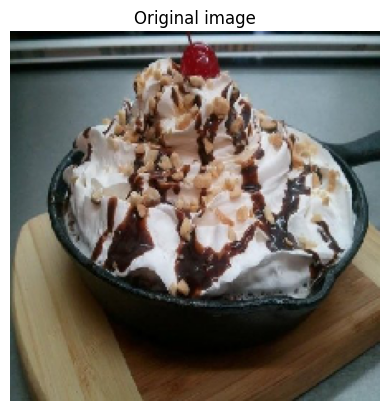

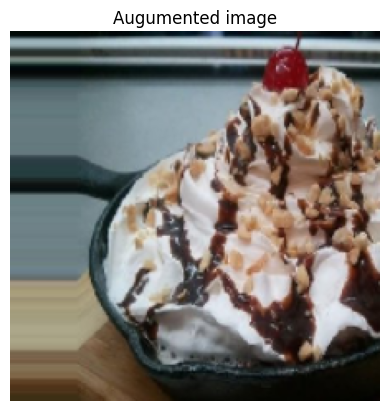

In [ ]:
import random
random_number = random.randint(0,32)
print(f"showing image number:{random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augumented image")
plt.axis(False)

In [ ]:
model_6 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics="accuracy")

his_6 = model_6.fit(train_data_aug,
                    epochs=5,
                    steps_per_epoch=len(train_data_aug),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 487ms/step - loss: 0.7428 - accuracy: 0.5160 - val_loss: 0.6893 - val_accuracy: 0.5300
Epoch 2/5
47/47 [==============================] - 23s 481ms/step - loss: 0.6939 - accuracy: 0.5553 - val_loss: 0.6851 - val_accuracy: 0.5280
Epoch 3/5
47/47 [==============================] - 23s 487ms/step - loss: 0.6898 - accuracy: 0.5447 - val_loss: 0.6698 - val_accuracy: 0.5420
Epoch 4/5
47/47 [==============================] - 23s 482ms/step - loss: 0.6863 - accuracy: 0.6127 - val_loss: 0.6568 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 23s 488ms/step - loss: 0.6734 - accuracy: 0.5933 - val_loss: 0.5970 - val_accuracy: 0.8020


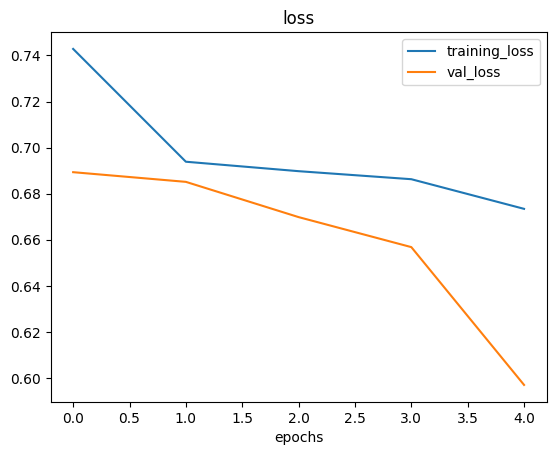

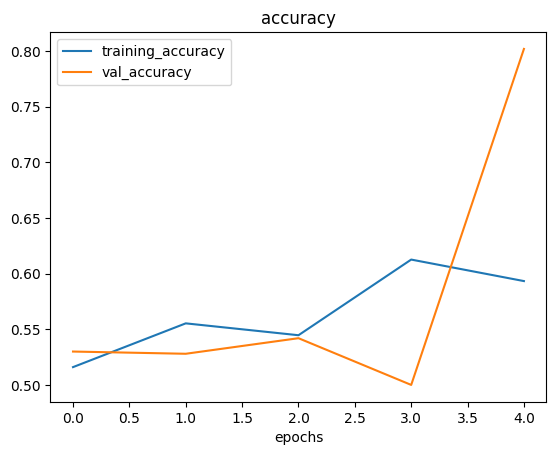

In [ ]:
plot_loss_curves(his_6)

#let's shuffle our aug training data


In [ ]:
train_data_augumented_shuffled = train_datagen_aug.flow_from_directory(train_dir,
                                                              target_size=(224,224),
                                                              batch_size=32,
                                                              class_mode="binary",
                                                              shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = Sequential([
    Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics="accuracy")

his_7 = model_7.fit(train_data_augumented_shuffled,
                    epochs=5,
                    steps_per_epoch=32,
                    validation_data= test_data,
                    validation_steps=len(test_data))

Epoch 1/5
32/32 [==============================] - 19s 532ms/step - loss: 0.6658 - accuracy: 0.5986 - val_loss: 0.5948 - val_accuracy: 0.6780
Epoch 2/5
32/32 [==============================] - 17s 538ms/step - loss: 0.6053 - accuracy: 0.6807 - val_loss: 0.4721 - val_accuracy: 0.8000
Epoch 3/5
32/32 [==============================] - 17s 514ms/step - loss: 0.5775 - accuracy: 0.7139 - val_loss: 0.5007 - val_accuracy: 0.7380
Epoch 4/5
32/32 [==============================] - 17s 528ms/step - loss: 0.5414 - accuracy: 0.7373 - val_loss: 0.4333 - val_accuracy: 0.8240
Epoch 5/5
32/32 [==============================] - 19s 601ms/step - loss: 0.5453 - accuracy: 0.7392 - val_loss: 0.4035 - val_accuracy: 0.8220


In [ ]:
train_data_augumented_shuffled

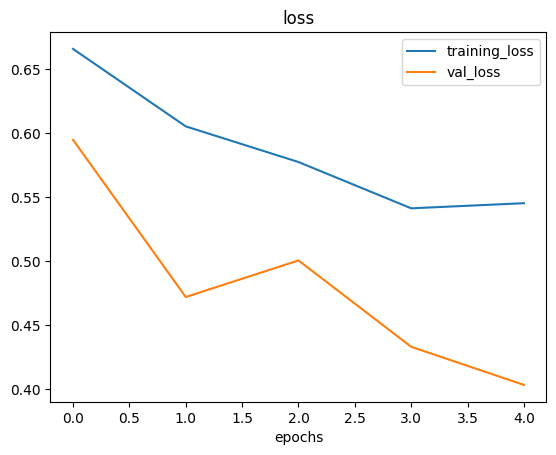

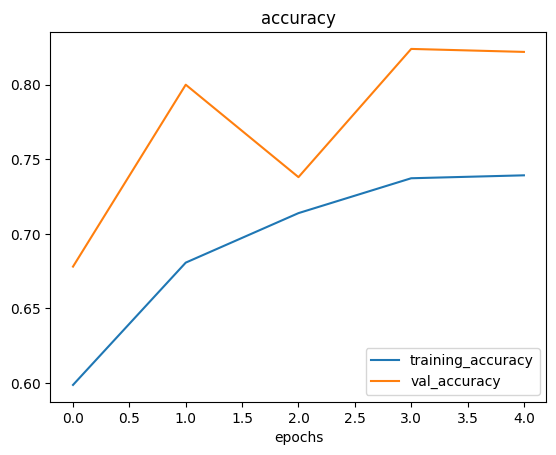

In [ ]:
plot_loss_curves(his_7)

#Making a Prediction with our trained model on our own custom data

In [ ]:
print(class_names)

['pizza' 'steak']


In [ ]:
#View our example image
import matplotlib.image as mpimg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

--2023-05-24 12:31:06--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg           [ <=>                ] 140.08K  --.-KB/s    in 0.009s  

2023-05-24 12:31:07 (14.4 MB/s) - ‘03-steak.jpeg’ saved [143443]



UnidentifiedImageError: ignored

In [ ]:
steak.shape

In [ ]:
tf.expand_dims(steak,axis=0).shape

In [ ]:
#create a function to format custom data

def load_and_prep_image(filename, img_shape=224):
  #read the image
  img =tf.io.read_file(filename)
  #Decode the read file into a tensor
  img = tf.image.decode_image(img)
  #resize the image
  img = tf.image.resize(img, size=[img_shape,img_shape])
  #rescale the image
  img=img/225.
  return img

In [ ]:
steak = load_and_prep_image("03-steak.jpeg")


In [ ]:
pred = model_7.predict(tf.expand_dims(steak,axis=0))

looks like our custom image is being put through our model, let's vizualise them

In [ ]:
#indexing the prediction class by roundeding
pred_class = class_names[int(tf.round(pred))]

In [ ]:
pred_class

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  # import the target img and preprocess it
  img = load_and_prep_image(filename)
  #make pred
  pred = model.predict(tf.expand_dims(img, axis=0))

  #get the pred class
  pred_class = class_names[int(tf.round(pred))]

  #plot the img
  plt.imshow(img)
  plt.title(f"prediction:{pred_class}")
  plt.axis(False);

In [ ]:
#pred_and_plot(model_10,"03-steak.jpeg")

InvalidArgumentError: ignored

Our model works

In [ ]:
#Download another image
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg


--2023-05-25 02:48:17--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg       [ <=>                ] 140.18K  --.-KB/s    in 0.07s   

2023-05-25 02:48:17 (1.87 MB/s) - ‘03-pizza-dad.jpeg’ saved [143544]



In [ ]:
pred_and_plot(model_7,"03-pizza-dad.jpeg")

## Multi-class Image Clasification

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip our data

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-05-25 02:48:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 142.250.1.128, 108.177.121.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   165MB/s    in 3.0s    

2023-05-25 02:48:28 (165 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

#walk through 10 classes of food images data
for dirpath, dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
#setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['471572.jpg']
Image shape:(512, 512, 3)


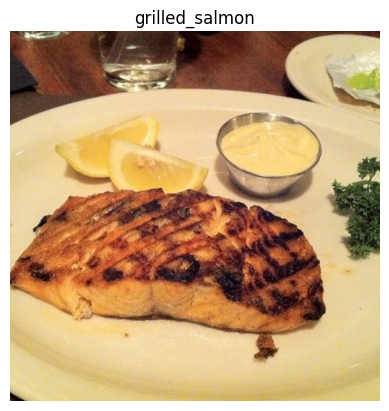

In [ ]:
import random
img = view_ran_img(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [ ]:
random.choice(class_names)

'chicken_wings'

#preprocess the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

#load data in from directories and turn it into tensors
train_data = train_datagen.flow_from_directory(train_dir,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode="categorical")
test_data =test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


#Create a model (start with a baseline)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, Flatten, Dense, Activation

model_8 = Sequential([
    Conv2D(10,3, input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

In [ ]:
his_8 = model_8.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 65s 226ms/step - loss: 2.0926 - accuracy: 0.2497 - val_loss: 1.9293 - val_accuracy: 0.3220
Epoch 2/5
235/235 [==============================] - 62s 263ms/step - loss: 1.8071 - accuracy: 0.3759 - val_loss: 1.8267 - val_accuracy: 0.3664
Epoch 3/5
235/235 [==============================] - 53s 227ms/step - loss: 1.3199 - accuracy: 0.5608 - val_loss: 1.9865 - val_accuracy: 0.3324
Epoch 4/5
235/235 [==============================] - 60s 256ms/step - loss: 0.6529 - accuracy: 0.7893 - val_loss: 2.6567 - val_accuracy: 0.3128
Epoch 5/5
235/235 [==============================] - 53s 225ms/step - loss: 0.2307 - accuracy: 0.9357 - val_loss: 3.8429 - val_accuracy: 0.2916


In [ ]:
#Evaluate the model
model_8.evaluate(test_data)

79/79 [==============================] - 12s 155ms/step - loss: 3.8429 - accuracy: 0.2916


[3.8429172039031982, 0.29159998893737793]

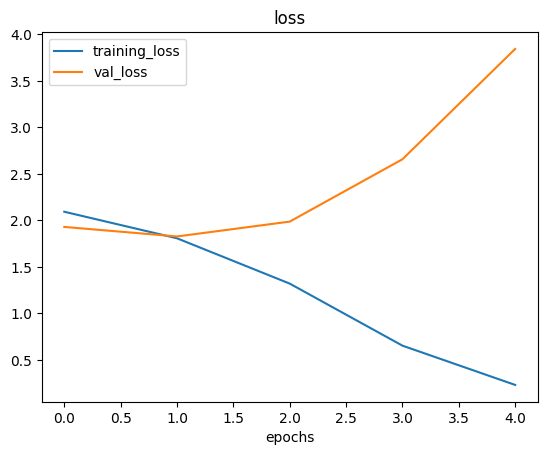

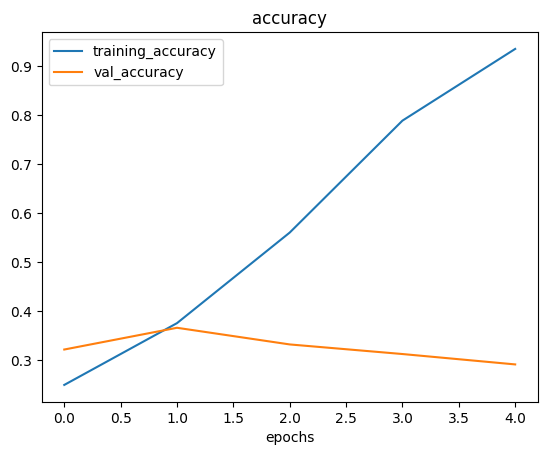

In [ ]:
plot_loss_curves(his_8)

#our model is overfitting, Adjust the model hyperparameters

In [ ]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

In [ ]:
#let's remove 2 conv layers

model_9 = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")



In [ ]:
model_9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [ ]:
his_9 = model_9.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 51s 209ms/step - loss: 2.1151 - accuracy: 0.2416 - val_loss: 1.9710 - val_accuracy: 0.3100
Epoch 2/5
235/235 [==============================] - 51s 217ms/step - loss: 1.7603 - accuracy: 0.4049 - val_loss: 1.9259 - val_accuracy: 0.3092
Epoch 3/5
235/235 [==============================] - 62s 262ms/step - loss: 1.4075 - accuracy: 0.5408 - val_loss: 1.9835 - val_accuracy: 0.3356
Epoch 4/5
235/235 [==============================] - 51s 219ms/step - loss: 0.9471 - accuracy: 0.7040 - val_loss: 2.1629 - val_accuracy: 0.3300
Epoch 5/5
235/235 [==============================] - 51s 215ms/step - loss: 0.5407 - accuracy: 0.8504 - val_loss: 2.5577 - val_accuracy: 0.3188


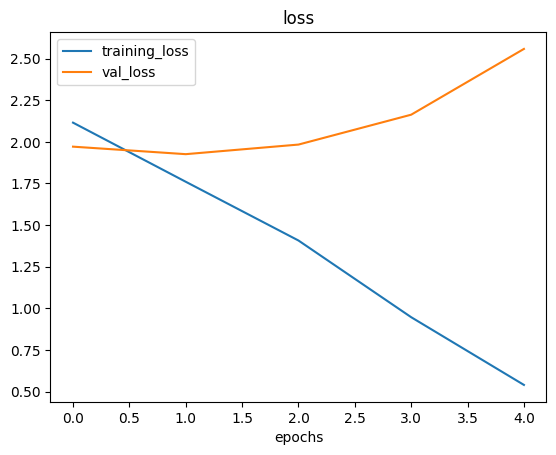

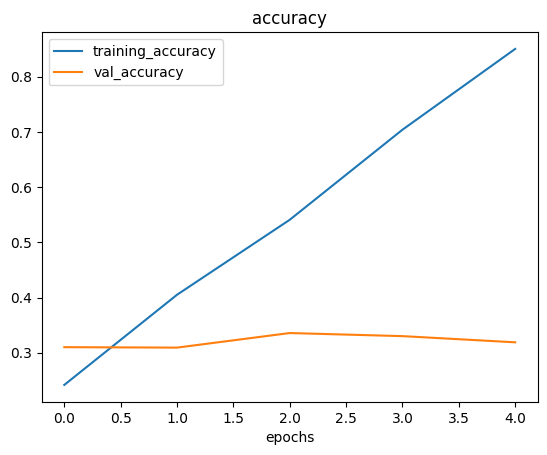

In [ ]:
plot_loss_curves(his_9)

#Simplifying didn't work, let's try data augumentation

In [ ]:
#create an augmented data gen instance
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
model_10 = tf.keras.models.clone_model(model_8)
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics="accuracy")



In [ ]:
his_10 = model_10.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 126s 526ms/step - loss: 2.2320 - accuracy: 0.1633 - val_loss: 2.1002 - val_accuracy: 0.2116
Epoch 2/5
235/235 [==============================] - 123s 524ms/step - loss: 2.1006 - accuracy: 0.2485 - val_loss: 1.9513 - val_accuracy: 0.3124
Epoch 3/5
235/235 [==============================] - 144s 612ms/step - loss: 2.0453 - accuracy: 0.2769 - val_loss: 1.9324 - val_accuracy: 0.3288
Epoch 4/5
235/235 [==============================] - 130s 555ms/step - loss: 1.9751 - accuracy: 0.3109 - val_loss: 1.8335 - val_accuracy: 0.3604
Epoch 5/5
235/235 [==============================] - 126s 536ms/step - loss: 1.9418 - accuracy: 0.3272 - val_loss: 1.7547 - val_accuracy: 0.3968


In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 12s 152ms/step - loss: 1.7547 - accuracy: 0.3968


[1.7547334432601929, 0.3968000113964081]

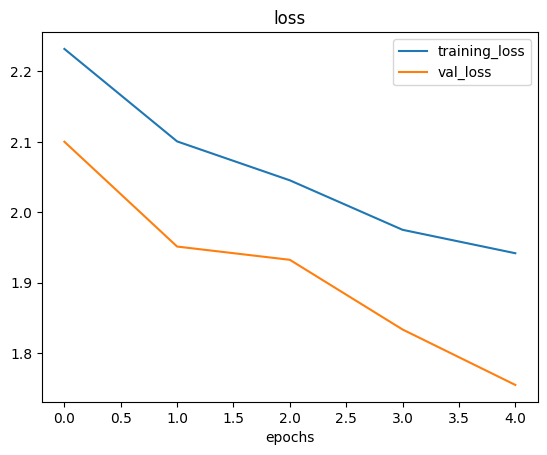

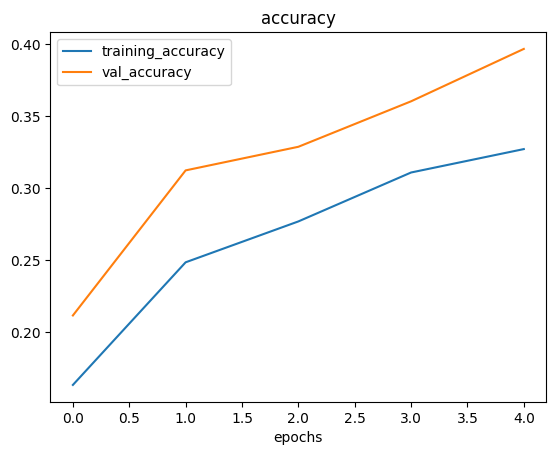

In [ ]:
plot_loss_curves(his_10)

#making predictions on custom images


In [ ]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg

--2023-05-25 03:59:14--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg       [ <=>                ] 140.18K  --.-KB/s    in 0.07s   

2023-05-25 03:59:14 (1.87 MB/s) - ‘03-hamburger.jpeg’ saved [143543]

--2023-05-25 03:59:14--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1     [ <=>                ] 140.18K  --.-KB/s    in 0.08s   

2023-05-25 03:59:15 (1.77 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [143544]

--20

In [ ]:
#reconfig pred and plot for multi class
def pred_and_plot(model, filename, class_names=class_names):
  # import the target img and preprocess it
  img = load_and_prep_image(filename)
  #make pred
  pred = model.predict(tf.expand_dims(img, axis=0))

  #add in logic for multiclass
  if len(pred[0]) > 1 :
    pred_class = clas_name[tf.argmax(pred[0])]
  else:
     pred_class = class_names[int(tf.round(pred))]

  #plot the img
  plt.imshow(img)
  plt.title(f"prediction:{pred_class}")
  plt.axis(False);

In [ ]:
#pred_and_plot(model=model_10,filename="03-steak.jpeg",class_names=class_names)

InvalidArgumentError: ignored

In [ ]:
model_10.save("saved_model")

In [ ]:
loaded_model_10 =tf.keras.models.load_model("saved_model")

In [ ]:
loaded_model_10.evaluate(test_data),

79/79 [==============================] - 17s 219ms/step - loss: 1.7547 - accuracy: 0.3968


([1.7547335624694824, 0.3968000113964081],
 <bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x7f09b1b04a90>>)

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 13s 166ms/step - loss: 1.7547 - accuracy: 0.3968


[1.7547332048416138, 0.3968000113964081]